In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [9]:
df=pd.read_csv("C:/Users/Kaustubh/OneDrive/Documents/Datasets/boston.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
MEDV       0
dtype: int64

In [11]:
df.mean()

crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
MEDV        22.532806
dtype: float64

In [12]:
x=df.drop("MEDV", axis=1)
y=df["MEDV"]

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

x_scaled=scaler.fit_transform(x)

In [16]:
x_scaled

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        2.87234043e-01, 1.00000000e+00, 8.96799117e-02],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 1.00000000e+00, 2.04470199e-01],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        5.53191489e-01, 9.89737254e-01, 6.34657837e-02],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.07891832e-01],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 9.91300620e-01, 1.31070640e-01],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        8.93617021e-01, 1.00000000e+00, 1.69701987e-01]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_scaled,y, test_size=0.3, random_state=42)

In [18]:
x_train.shape

(354, 13)

In [19]:
x_train[0].shape

(13,)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
model=Sequential()
model.add(Dense(128, activation= 'relu', input_shape= x_train[0].shape))
model.add(Dense(64, activation= 'relu'))
model.add(Dense(32, activation= 'relu'))
model.add(Dense(16, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

C:\Users\Kaustubh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
import time
start=time.time()

In [26]:
history=model.fit(x_train,y_train, epochs=50, validation_split=0.05, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13.1932 - mae: 2.5179 - val_loss: 58.2365 - val_mae: 4.6877
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.0445 - mae: 2.8599 - val_loss: 61.2643 - val_mae: 4.4091
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 14.5660 - mae: 2.6471 - val_loss: 54.7857 - val_mae: 4.3905
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.2863 - mae: 2.9082 - val_loss: 55.6880 - val_mae: 4.4933
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.3383 - mae: 2.5750 - val_loss: 59.3921 - val_mae: 4.3877
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.8374 - mae: 2.6552 - val_loss: 59.6508 - val_mae: 4.3412
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1869 - mae: 2.4596 - val_loss: 55.8496 - val_mae: 4.3445
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13.7370 - mae: 2.5139 - val_loss: 61.7235 - val_mae: 4.4190
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - los

In [27]:
end=time.time()
print("Training time:",end-start)

Training time: 45.82436752319336


In [29]:
pred=model.predict(x_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [30]:
print("Prediction Time:",pred)

Prediction Time: [[26.125656 ]
 [36.87319  ]
 [16.94426  ]
 [26.522675 ]
 [16.560055 ]
 [19.995739 ]
 [17.884815 ]
 [15.655749 ]
 [23.266602 ]
 [18.31832  ]
 [19.73339  ]
 [18.932625 ]
 [ 4.50438  ]
 [19.703432 ]
 [18.827326 ]
 [26.052324 ]
 [20.543085 ]
 [10.376319 ]
 [44.954895 ]
 [15.194486 ]
 [27.142845 ]
 [27.55146  ]
 [14.878758 ]
 [22.911156 ]
 [16.723732 ]
 [15.664263 ]
 [21.50375  ]
 [12.561225 ]
 [20.153645 ]
 [17.318375 ]
 [20.190521 ]
 [24.719217 ]
 [23.868473 ]
 [21.115887 ]
 [14.655808 ]
 [16.46778  ]
 [31.955374 ]
 [21.42123  ]
 [21.441036 ]
 [25.610811 ]
 [14.361081 ]
 [29.950922 ]
 [48.024273 ]
 [18.060173 ]
 [25.148888 ]
 [15.939119 ]
 [16.0203   ]
 [27.270952 ]
 [18.981525 ]
 [29.19644  ]
 [20.381546 ]
 [35.68325  ]
 [17.75446  ]
 [24.626995 ]
 [45.327415 ]
 [24.536072 ]
 [17.148565 ]
 [33.609657 ]
 [24.778156 ]
 [16.13482  ]
 [23.800957 ]
 [31.85176  ]
 [33.36246  ]
 [16.203724 ]
 [21.750706 ]
 [17.235302 ]
 [17.56912  ]
 [24.968784 ]
 [30.43605  ]
 [11.671443 ]
 [2

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,021 (148.52 KB)

 Trainable params: 12,673 (49.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 25,348 (99.02 KB)

In [23]:
mse,mae=model.evaluate(x_test,y_test)
print("mse",mse)
print("mae",mae)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0647 - mae: 2.3827
mse 16.834978103637695
mae 2.5798749923706055


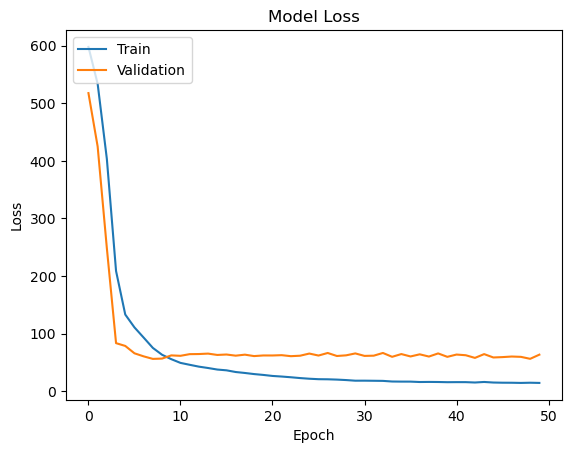

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
